<a href="https://colab.research.google.com/github/Henil21/neural_network_regression/blob/main/01_Neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro To Neural Network Regression 🎯**
predicting output based on some other combination of variable: ◀

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# **Creating data to view and fit 🦊**

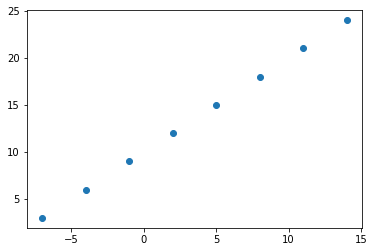

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# creating features
x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# creating lables
y= np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
# visualize it
plt.scatter(x,y)

In [3]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# **Input & Output shapes**

In [4]:
# create a demo tensor for our housing prediction problem
# x[0],y[0]
house_info=tf.constant(["bedroom","garage","bathroom"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'garage', b'bathroom'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
# Turning numpy array in tensor
X=tf.constant(x,dtype=tf.float32)
Y=tf.constant(y,dtype=tf.float32)
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# **modelling with Tensorflow** 📊

1.  **creating a model** defining the input and output layer as well as hidden layer
2.   **compiling a model**-defining the loss function and optmizer and evaluation matrix(what we can use to interpret the performance of our model)
3.   **Fitting a model**- letting the model try to find pattern between x & y or (feature and label)



In [6]:
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # layer one with 1 neuron
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 623ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [7]:
model.predict([17.0])
# not acurate

array([[12.716021]], dtype=float32)

# **Improving our model 🪶**
 we can improve our model by altering the steps we took to create a model.
1.   **Creating a model**- we might add more layers ,increase the number of hidden units (all called neurons) within each of the hideen layer , can change the cactivation function of each layer
2.  **COMPILING A MODEL**- we might change the optimixagion function or the **learning rate** of the optimization function.
3. **fitting a model**- we might fit a model for more **epochs** (leave it for longer) or on more data (give the model more example to learn from).




In [8]:
# creating a model
model=tf.keras.Sequential([
                  tf.keras.layers.Dense(100, activation="relu"),   
                  tf.keras.layers.Dense(100, activation="relu"),                         
                  tf.keras.layers.Dense(100, activation="relu"),              
                            
                  tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])
# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=500,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
model.predict([17.0])

array([[26.755497]], dtype=float32)

# **Evaluting a model 🦾** 
A typical workflow when you build a  neural network model 
**Build a model -> fit it -> evaluate it -> tweak a model -> Fit it -> evaluate it -> tweak it**

when it come to evaluation there are only three world one should memorise and that is ***Visualize Visualize Visualize 🧠***

It's a good idea to visualize:

* The data - what data are we working with? What does it look
like?

* The model itself - what does our model look like?
* The training of a model - how does a model perform while it
learns?
* The predictions of the modle - how do the predictions of a model line up against the ground truth (the original labels) 


In [67]:
x=tf.range(-100,100,4)
y=x+10
x,y


(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

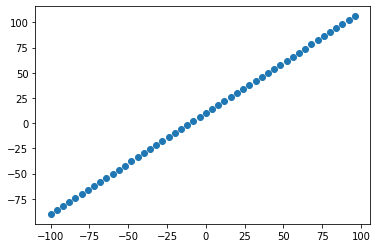

In [68]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

# **Three sets** 3
* **training set**- model learn from this data 70-80% of total data available.
* **Validation set**- model get tuned on this data set 10-15% data available.
* **Test set**- model get evaluated on this set to test what it has learned.

In [12]:
# spliting data into train and test set
x_train=x[:40]
y_train=y[:40]
x_test=x[40:]
y_test=y[40:]
x_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

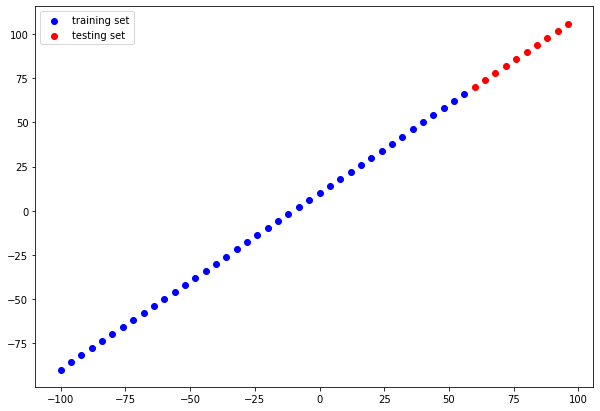

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,c="b",label="training set")
plt.scatter(x_test,y_test,c="r",label="testing set")
plt.legend()


# **Lets create neural network for this 🛩

In [14]:
model=tf.keras.Sequential([
              tf.keras.layers.Dense(10,name="layer__1")
])
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# model.fit(x_train,y_train,epochs=100)
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)


In [15]:
model.predict([100])

array([[89.93192 , 89.85783 , 89.877045, 89.932365, 89.91528 , 89.9103  ,
        89.866165, 89.88764 , 89.88527 , 89.91023 ]], dtype=float32)

In [16]:
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer__1 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [17]:
# model.build()

In [18]:
# model=tf.keras.Sequential([
#               tf.keras.layers.Dense(1,name="layer__1")
# ])
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mae"])
# # model.fit(x_train,y_train,epochs=100)
# model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)
# ------------------------------------------------------------------------------------------------------------------------------------------------
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]),
  tf.keras.layers.Dense(12),
  tf.keras.layers.Dense(1) # define the input_shape to our model
   # define the input_shape to our model
   # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)


In [19]:

# model.summary()
# # cntrl+shifr+enter

* **Total params - total number of parameters in the model.**

* **Trainable parameters - these are the parameters (patterns) the model can update as it trains.**
* **Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).**

📖 **Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 **Exercise**: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

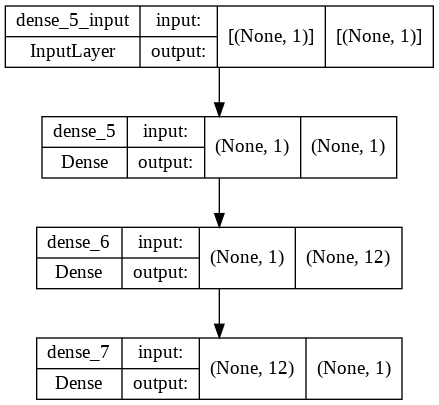

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model=model ,show_shapes=True)

# **Visualizing the predictions 🌱**


* Now we've got a trained model, let's visualize some predictions.

* To visualize predictions, it's always a good idea to plot them against the ground truth labels.

* Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

* First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [21]:
# Makeing some prediction
y_pred=model.predict(x_test)
# print("xtest",x_test)
y_pred

array([[ 69.13807 ],
       [ 73.08702 ],
       [ 77.035965],
       [ 80.984924],
       [ 84.93388 ],
       [ 88.88283 ],
       [ 92.831795],
       [ 96.78074 ],
       [100.72969 ],
       [104.67865 ]], dtype=float32)

In [22]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note :**  If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

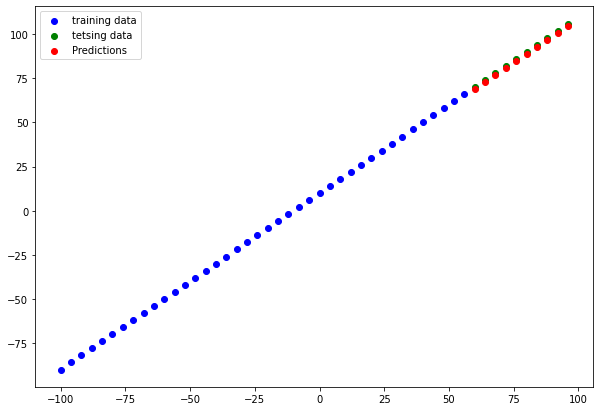

In [23]:
def plot_predictions(
                 train_data=x_train,
                 train_labels=y_train,
                 test_data=x_test,
                 test_labels=y_test,
                 predictions=y_pred):
 plt.figure(figsize=(10,7))
 plt.scatter(train_data,train_labels,c="b",label="training data")
 plt.scatter(test_data,test_labels,c="g",label="tetsing data")
 plt.scatter(test_data, predictions, c="r", label="Predictions")
 plt.legend();
plot_predictions()

# **Evaluating model with regression metrics ⛳**

* Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

* Depending on the problem you're working on, different models have different evaluation metrics.

* Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)**- the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the 
* predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

* You can also use ***model.evaluate()*** which will return the loss of the model as well as any metrics setup during the compile step

In [24]:
# evaluate the model at train set
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 339ms/step - loss: 1.0916 - mae: 1.0916


[1.0916411876678467, 1.0916411876678467]

In [25]:
# calculate the mean absolute error (mae)
tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.86193 , 15.530383, 12.978421, 11.20603 , 10.213223, 10.      ,
       10.566359, 11.912295, 14.037814, 16.94292 ], dtype=float32)>

In [26]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.13807 ],
       [ 73.08702 ],
       [ 77.035965],
       [ 80.984924],
       [ 84.93388 ],
       [ 88.88283 ],
       [ 92.831795],
       [ 96.78074 ],
       [100.72969 ],
       [104.67865 ]], dtype=float32)>

In [27]:
y_test-y_pred


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  1,   5,   9,  13,  17,  21,  25,  29,  33,  37],
       [ -3,   1,   5,   9,  13,  17,  21,  25,  29,  33],
       [ -7,  -3,   1,   5,   9,  13,  17,  21,  25,  29],
       [-10,  -6,  -2,   2,   6,  10,  14,  18,  22,  26],
       [-14, -10,  -6,  -2,   2,   6,  10,  14,  18,  22],
       [-18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18],
       [-22, -18, -14, -10,  -6,  -2,   2,   6,  10,  14],
       [-26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10],
       [-30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6],
       [-34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2]], dtype=int32)>

#  **🛠 to compare two tensor it must be in same shape**

In [28]:
# Removes dimensions of size 1 from the shape of a tensor.
#  Given a tensor input, this operation returns a tensor of the same type with
# all dimensions of size 1 removed. If you don't want to remove all size 1
# dimensions, you can remove specific size 1 dimensions by specifying
tf.squeeze(y_pred)


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.13807 ,  73.08702 ,  77.035965,  80.984924,  84.93388 ,
        88.88283 ,  92.831795,  96.78074 , 100.72969 , 104.67865 ],
      dtype=float32)>

In [29]:
# calculate the mean absolute error (mae)
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1.0916436>

In [30]:
# calculatr the mean square error(mse)
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))


<tf.Tensor: shape=(), dtype=float32, numpy=1.2131828>

# **running experiments to improve our model ✨**

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

* **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
* **Make your model larger**(use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* **Train for longer** - give your model more of a chance to find the patterns in the data.

In [31]:
x_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [32]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,y_pred)

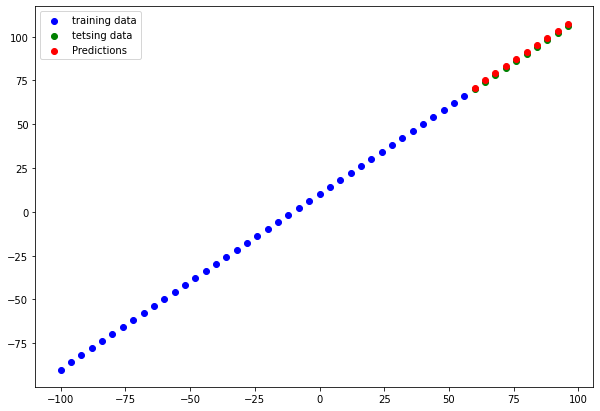

In [33]:
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)

])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mse"])

# Fit the model
model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100,verbose=0)
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)


In [34]:
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(1.2311256, 1.5432541)

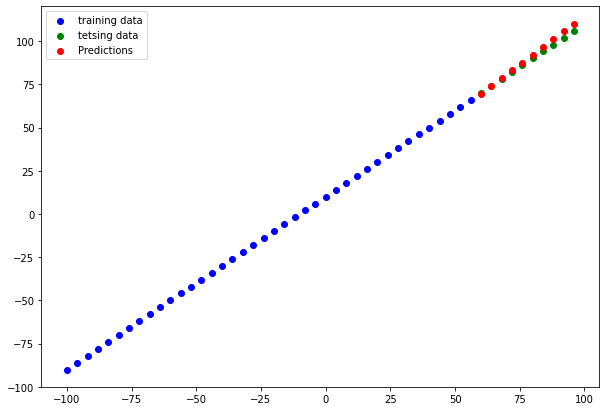

In [35]:
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [36]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

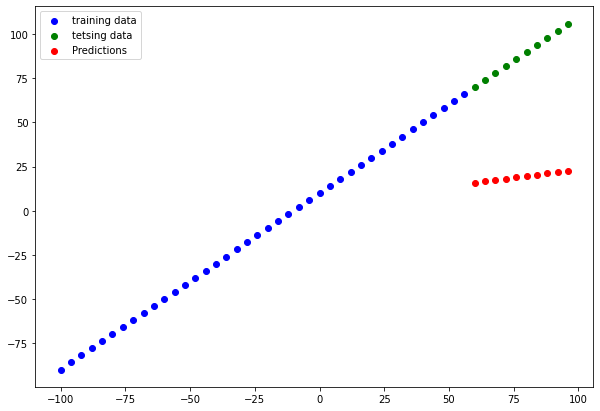

In [37]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [38]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

**Comparing results**

In [39]:
import pandas as pd
model_results = [["model_1",mae_1,mse_1],
                 ["model_2",mae_2,mse_2],
                 ["model_3",mae_3,mse_3]]
results=pd.DataFrame(model_results,columns=["model","mae","mse"])
results

,model,mae,mse
0,model_1,1.231126,1.543254
1,model_2,1.909811,5.459232
2,model_3,68.687859,4804.471680


**Tracking your experiments**
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

* 📖 **Resourc**e: But as you build more models, you'll want to look into using tools such as:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

In [40]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


# **Saving our model**
* Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

* You can save a TensorFlow/Keras model using model.save().

**There are two ways to save a model in TensorFlow:**

* The SavedModel format (default). 
* The HDF5 format. 

The main **difference** between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [41]:
# Saving modle using SaveModel format
model_1.save("best_performing_model")

In [42]:
# Saving modle using h5format
model_1.save("best_performing_model.h5")

**Loading saved model 🕑**

In [43]:
# loading model
loading=tf.keras.models.load_model("/content/best_performing_model.h5")
loading.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               200       
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [44]:
# comparing model with saved model prediction
p1=model_1.predict(x_test)
p2=loading.predict(x_test)
p1==p2
# p1,p2


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [45]:
# loading default save model format
loading_2=tf.keras.models.load_model("/content/best_performing_model")
p_1=model_1.predict(x_test)
p_2=loading_2.predict(x_test)
p_1==p_2

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## **downloading model from collab ⬇**
* Right click on the file in the files pane and click 'download'.
* Use the code below.


In [46]:
# from google.colab import files
# files.download("best_performing_model.h5")

## **A larger example**
* we will use *https://www.kaggle.com/datasets*

In [47]:

# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [49]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [51]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [52]:

# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [53]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(0.1),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=250,verbose=2)

Epoch 1/250
34/34 - 2s - loss: 8232.9756 - mae: 8232.9756 - 2s/epoch - 50ms/step
Epoch 2/250
34/34 - 0s - loss: 6236.7129 - mae: 6236.7129 - 136ms/epoch - 4ms/step
Epoch 3/250
34/34 - 0s - loss: 4648.9487 - mae: 4648.9487 - 196ms/epoch - 6ms/step
Epoch 4/250
34/34 - 0s - loss: 4461.6143 - mae: 4461.6143 - 154ms/epoch - 5ms/step
Epoch 5/250
34/34 - 0s - loss: 4059.1047 - mae: 4059.1047 - 113ms/epoch - 3ms/step
Epoch 6/250
34/34 - 0s - loss: 3912.0562 - mae: 3912.0562 - 164ms/epoch - 5ms/step
Epoch 7/250
34/34 - 0s - loss: 4239.3311 - mae: 4239.3311 - 150ms/epoch - 4ms/step
Epoch 8/250
34/34 - 0s - loss: 4408.6553 - mae: 4408.6553 - 165ms/epoch - 5ms/step
Epoch 9/250
34/34 - 0s - loss: 3920.8206 - mae: 3920.8206 - 148ms/epoch - 4ms/step
Epoch 10/250
34/34 - 0s - loss: 3985.5312 - mae: 3985.5312 - 147ms/epoch - 4ms/step
Epoch 11/250
34/34 - 0s - loss: 3942.1646 - mae: 3942.1646 - 127ms/epoch - 4ms/step
Epoch 12/250
34/34 - 0s - loss: 4014.5359 - mae: 4014.5359 - 146ms/epoch - 4ms/step
Epo

In [54]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3587.2849 - mae: 3587.2849


[3587.284912109375, 3587.284912109375]

In [55]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(500),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1),


])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# Fit the model
history=insurance_model.fit(X_train, y_train, epochs=300,verbose=2)

Epoch 1/300
34/34 - 1s - loss: 12018.3857 - mae: 12018.3857 - 571ms/epoch - 17ms/step
Epoch 2/300
34/34 - 0s - loss: 7532.8237 - mae: 7532.8237 - 87ms/epoch - 3ms/step
Epoch 3/300
34/34 - 0s - loss: 7256.1143 - mae: 7256.1143 - 86ms/epoch - 3ms/step
Epoch 4/300
34/34 - 0s - loss: 7052.1528 - mae: 7052.1528 - 86ms/epoch - 3ms/step
Epoch 5/300
34/34 - 0s - loss: 6864.7529 - mae: 6864.7529 - 92ms/epoch - 3ms/step
Epoch 6/300
34/34 - 0s - loss: 6662.5781 - mae: 6662.5781 - 87ms/epoch - 3ms/step
Epoch 7/300
34/34 - 0s - loss: 6600.0093 - mae: 6600.0093 - 89ms/epoch - 3ms/step
Epoch 8/300
34/34 - 0s - loss: 6465.3379 - mae: 6465.3379 - 96ms/epoch - 3ms/step
Epoch 9/300
34/34 - 0s - loss: 6401.5718 - mae: 6401.5718 - 88ms/epoch - 3ms/step
Epoch 10/300
34/34 - 0s - loss: 6304.1616 - mae: 6304.1616 - 87ms/epoch - 3ms/step
Epoch 11/300
34/34 - 0s - loss: 6255.5547 - mae: 6255.5547 - 93ms/epoch - 3ms/step
Epoch 12/300
34/34 - 0s - loss: 6136.4951 - mae: 6136.4951 - 98ms/epoch - 3ms/step
Epoch 13/

Text(0.5, 0, 'epochs')

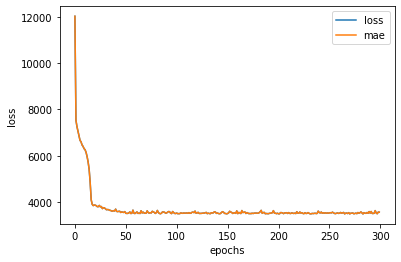

In [57]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**How long should we train? 🤔**

* It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

* Let's train the same model as above for a little longer. We can do this but calling fit on it again.


# **preprocessing data (Normalization and standarization) ✴**

In [58]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

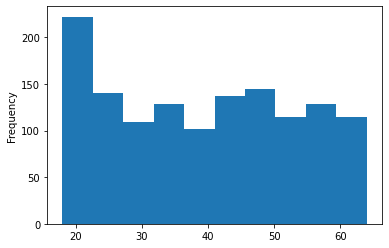

In [59]:
X["age"].plot(kind="hist")

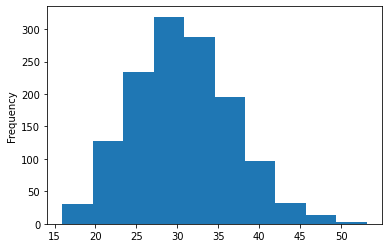

In [60]:
X['bmi'].plot(kind="hist")

# **Preprocessing data (normalization and standardization) ⚡**
* A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

* This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

* There is another process call standardization which converts all of your data to unit variance and 0 mean.

* These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

In [61]:
import pandas as pd
import tensorflow as  tf
import matplotlib.pyplot as plt
# readind insurance 
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# transfering column
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]) ,#turn all the data in 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

# fit the column transformer to our traning data
ct.fit(X_train)
# transform traning and test data with normalization and onehot encoding
x_train_normal=ct.transform(X_train)
x_test_normal=ct.transform(X_test)

 

In [63]:
X_train.shape,x_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
tf.random.set_seed(42)
final_model=tf.keras.Sequential([
   
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(500,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu"),



])
# final_model.compile(tf.keras.losses.mae,
#          optimizer=tf.keras.optimizers.Adam(),
#          metrics=["mae"])
final_model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(0.01),
                          metrics=['mae'])

# fitting
final_model.fit(x_train_normal,y_train,epochs=300)

In [72]:
final_model.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1526.6003 - mae: 1526.6003


[1526.600341796875, 1526.600341796875]

In [75]:
final_model.predict(x_test_normal)

array([[ 9244.617 ],
       [ 5344.744 ],
       [29591.95  ],
       [ 9458.646 ],
       [30125.24  ],
       [ 4646.5996],
       [ 2175.083 ],
       [14319.608 ],
       [ 3811.8296],
       [10461.888 ],
       [18436.023 ],
       [ 7384.8066],
       [ 3983.7856],
       [47919.547 ],
       [49957.32  ],
       [45692.797 ],
       [ 9992.232 ],
       [43767.15  ],
       [ 8336.286 ],
       [22308.91  ],
       [ 5029.8623],
       [ 7507.048 ],
       [ 1262.0713],
       [ 2850.0298],
       [11257.26  ],
       [11177.82  ],
       [12744.677 ],
       [ 5281.9185],
       [ 9884.479 ],
       [ 1111.6034],
       [ 8331.331 ],
       [12092.978 ],
       [ 2024.9058],
       [ 5793.3643],
       [ 2934.249 ],
       [ 7634.0767],
       [ 2639.7942],
       [ 7396.1562],
       [24320.94  ],
       [39740.914 ],
       [ 4743.3384],
       [ 2709.9172],
       [11780.36  ],
       [12355.513 ],
       [ 4933.4414],
       [12409.154 ],
       [ 3710.5178],
       [ 4497

Text(0.5, 0, 'epochs')

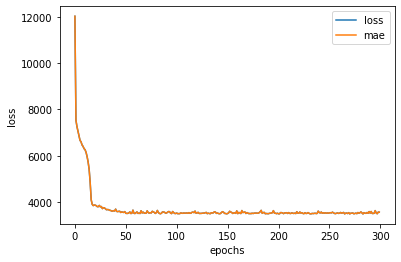

In [66]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')